In [1]:
%matplotlib inline

In [2]:
%run notebook_setup
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

import exoplanet as xo

theano version: 1.0.4
pymc3 version: 3.6
exoplanet version: 0.1.6


In [78]:
E_grid = np.linspace(0, np.pi, 201)
e_grid = np.linspace(0.0, 1.0-1e-10, 210)
E, e = np.meshgrid(E_grid, e_grid, indexing="ij")
M = E - e * np.sin(E)
f = 2 * np.arctan2(np.sqrt(1+e) * np.tan(0.5*E), np.sqrt(1-e))

f_val = xo.orbits.get_true_anomaly(M, e).eval()

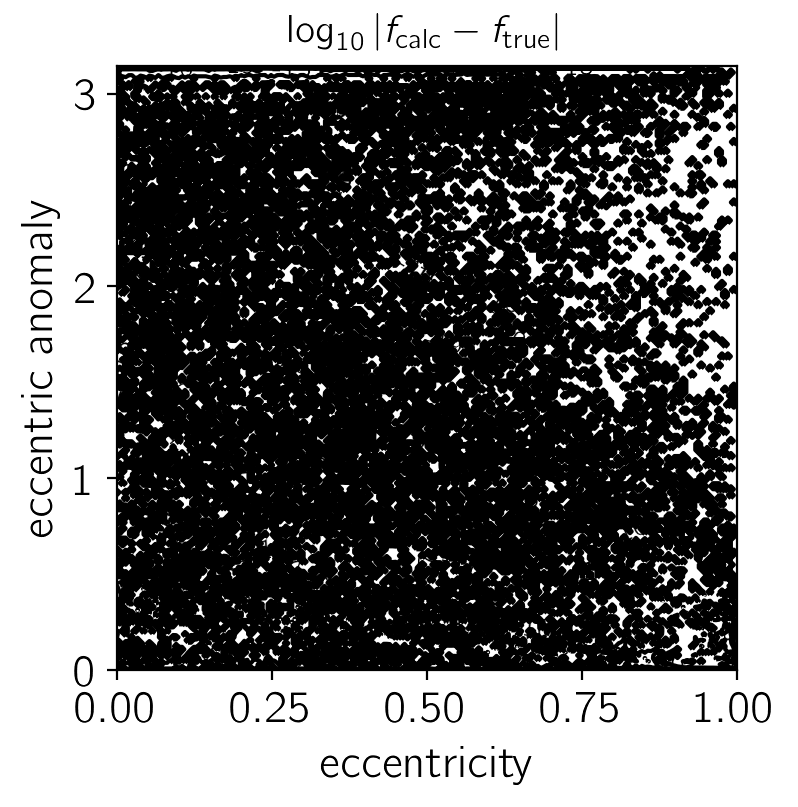

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

delta = np.log10(np.clip(np.abs((f - f_val)) % (2*np.pi), 1e-19, 100))
# print(delta.max())
# delta = gaussian_filter(delta, 8.0)

C = ax.contour(e_grid, E_grid, delta,
               levels=[-19.0, -18.0, -17.0, -16.0, -15.0, -14.0],
               colors="k", linestyles="solid")
ax.clabel(C, C.levels, inline=True, fmt="{0:.0f}".format, fontsize=10)

ax.set_xlabel("eccentricity")
ax.set_ylabel("eccentric anomaly")
ax.set_title("$\log_{10} |f_\mathrm{calc} - f_\mathrm{true}| $", fontsize=14);

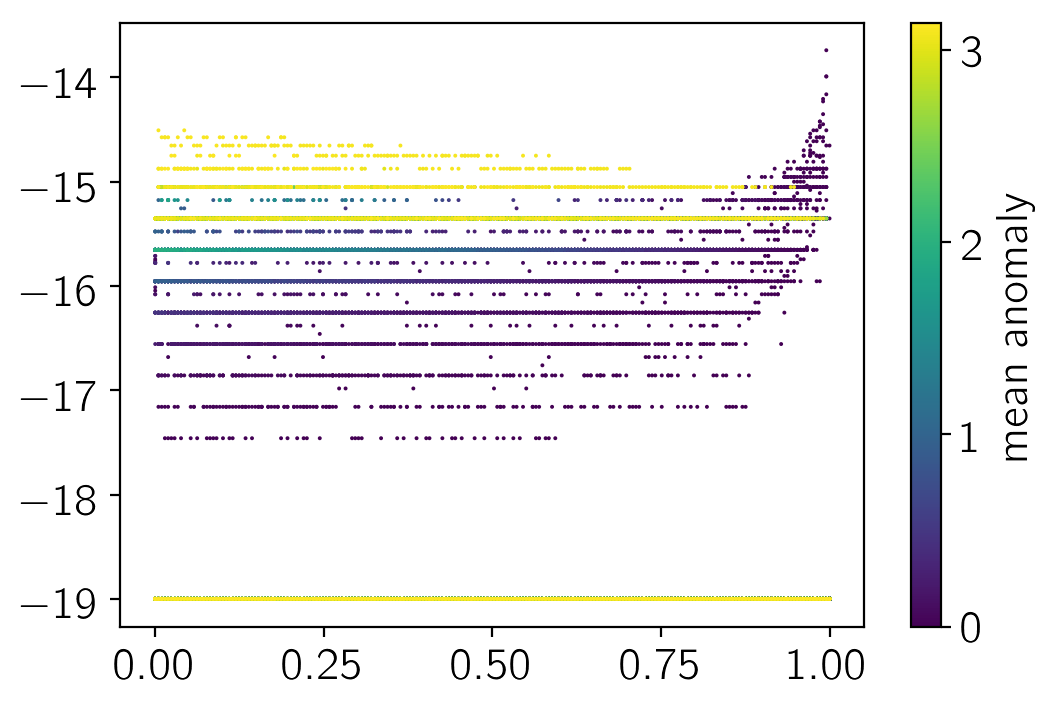

In [80]:
plt.scatter(e, delta, c=M, s=2, edgecolor="none")
plt.colorbar(label="mean anomaly");

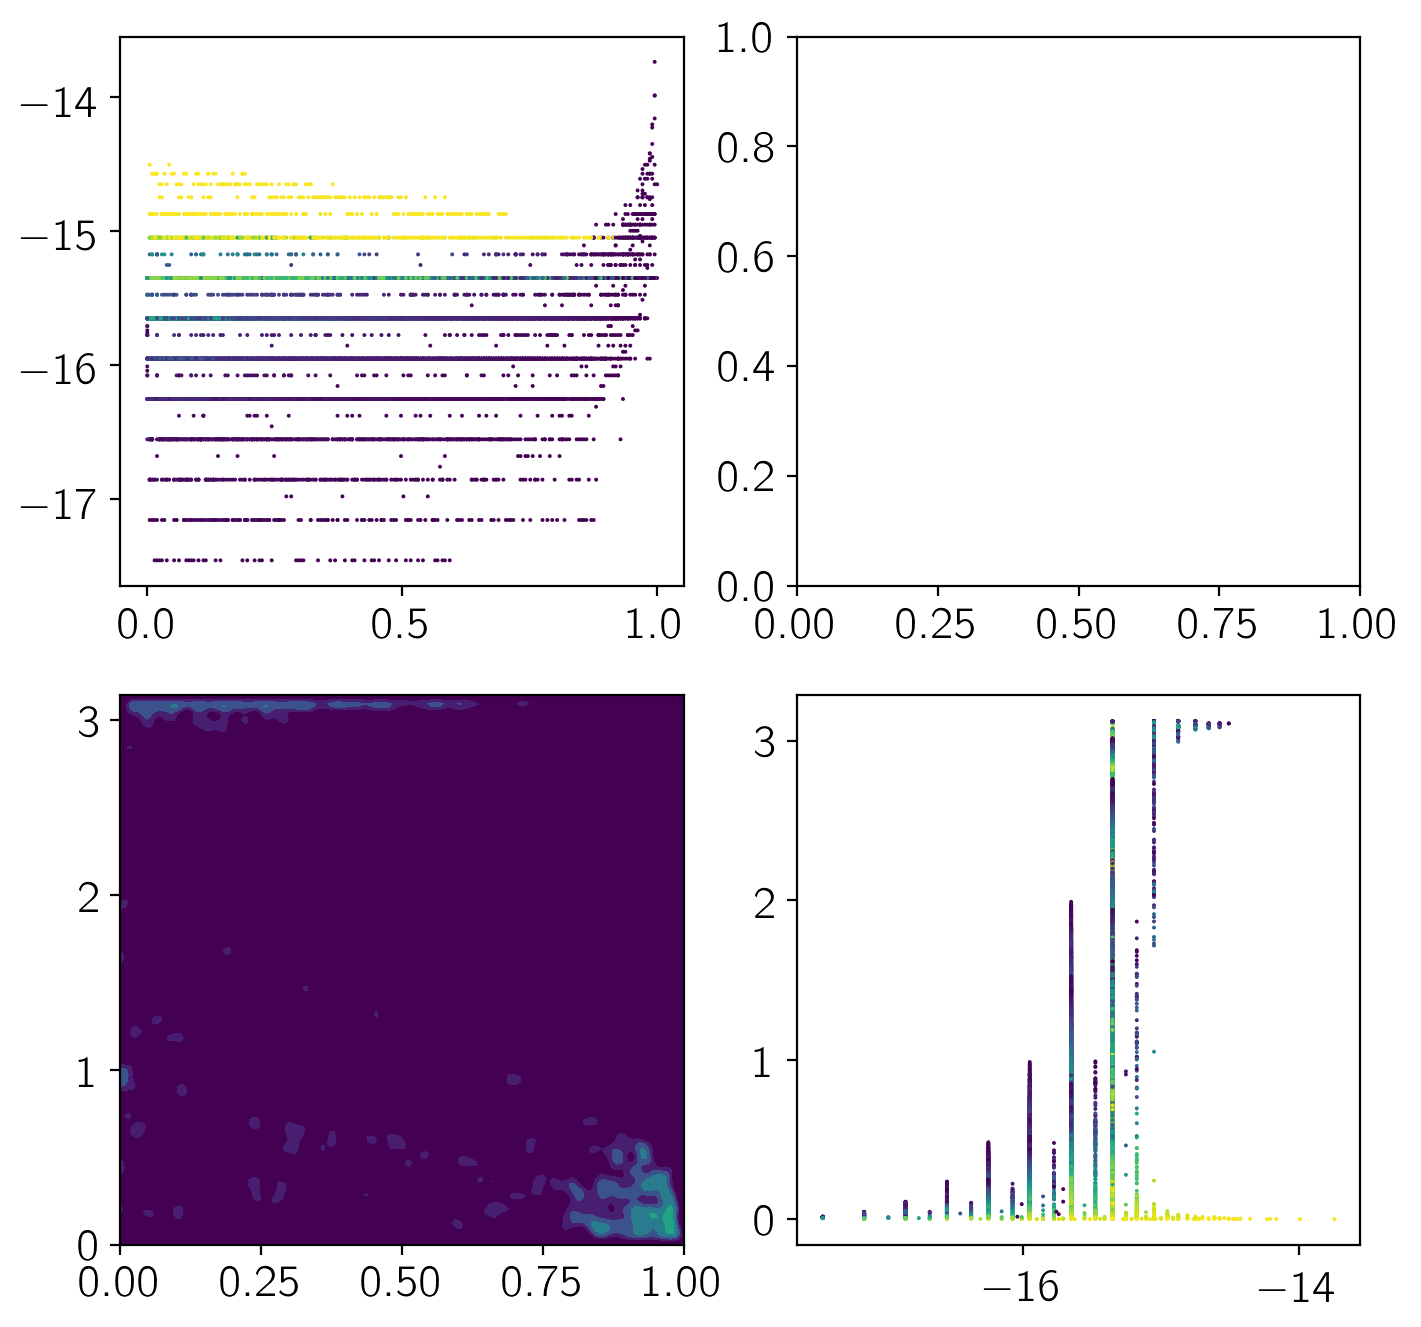

In [118]:
delta = np.log10(np.clip(np.abs((f - f_val)) % (2*np.pi), 1e-30, 100.0))
delta_s = gaussian_filter(delta, 2.0)

inds = np.argsort(delta.flatten())
inds = inds[delta.flatten()[inds] > -25]
delta_f = delta.flatten()[inds]
e_f = e.flatten()[inds]
M_f = M.flatten()[inds]

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

ax = axes[0, 0]
ax.scatter(e_f, delta_f, c=M_f, s=2, edgecolor="none")

ax = axes[1, 1]
ax.scatter(delta_f, M_f, c=e_f, s=2, edgecolor="none")

ax = axes[1, 0]
C = ax.contourf(e_grid, E_grid, delta_s, levels=np.arange(-19, -12).astype(float),
                extend="min")

In [106]:
delta_s

array([[-22.20341364, -22.20538763, -22.20898593, ..., -18.25096981,
        -18.26695774, -18.27526956],
       [-22.18103691, -22.18298519, -22.18653731, ..., -18.24653396,
        -18.26282453, -18.27129143],
       [-22.13705926, -22.13895794, -22.14242119, ..., -18.23818184,
        -18.25506902, -18.2638416 ],
       ...,
       [-19.82708559, -19.81410622, -19.7887443 , ..., -26.97399947,
        -27.0288192 , -27.0567117 ],
       [-19.79919641, -19.78596956, -19.76012287, ..., -26.93532549,
        -26.99098228, -27.0193009 ],
       [-19.78523818, -19.77188739, -19.74579791, ..., -26.91570138,
        -26.97178259, -27.00031725]])

In [104]:
np.arange(-19, -15)

array([-19, -18, -17, -16])